### 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [78]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [79]:
X_st = X.copy().astype(np.float64)
X_st[1] = (X[1] - X[1].mean()) / X[1].std()
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

In [80]:
X_norm = X.copy().astype(np.float64)
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())

In [81]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [82]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= eta * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 

#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [91]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, lambda_=0.001)

array([57.34265734,  6.09867617,  1.45506343,  4.10895676])

In [92]:
lambda_plot = np.linspace(1e-8, 5, 100)
w_plot_0, w_plot_1, w_plot_2, w_plot_3 = np.array([]), np.array([]), np.array([]), np.array([])

In [93]:
for i in range(len(lambda_plot)):
    temp = gradient_descent_reg_l2(X_st, y, iterations=1000, eta=1e-3, lambda_=lambda_plot[i])
    w_plot_0 = np.append(w_plot_0, temp[0])
    w_plot_1 = np.append(w_plot_1, temp[1])
    w_plot_2 = np.append(w_plot_2, temp[2])
    w_plot_3 = np.append(w_plot_3, temp[3])

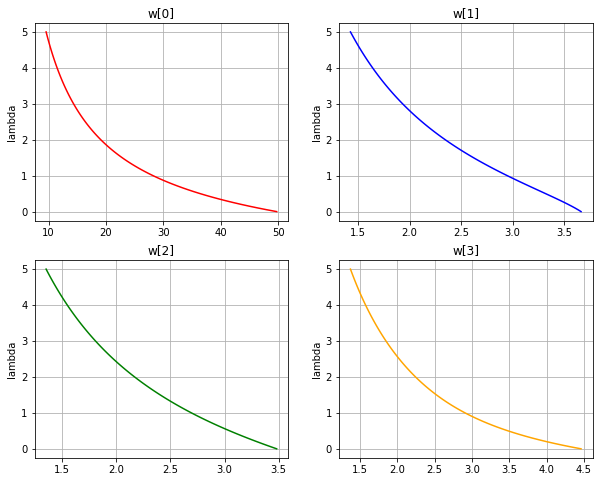

In [94]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax_1, ax_2, ax_3, ax_4 = ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1]

ax_1.plot(w_plot_0, lambda_plot, color='r')
ax_1.set_ylabel('lambda')
ax_1.grid()
ax_1.set_title('w[0]')

ax_2.plot(w_plot_1, lambda_plot, color='b')
ax_2.set_ylabel('lambda')
ax_2.grid()
ax_2.set_title('w[1]')

ax_3.plot(w_plot_2, lambda_plot, color='g')
ax_3.set_ylabel('lambda')
ax_3.grid()
ax_3.set_title('w[2]')

ax_4.plot(w_plot_3, lambda_plot, color='orange')
ax_4.set_ylabel('lambda')
ax_4.grid()
ax_4.set_title('w[3]')

plt.show()

 Попробовала разные значения lambda, графики изменяются плавно, с увеличением lambda, быстрее приближает веса к нулю, следовательно регуляризация сильнее. Также при снижении значения lambda линия становится более пологой. Если значение лямбда слишком маленькое, тогда модель будет более сложной, и увеличится риск переобучения

### 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [97]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= eta * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [96]:
gradient_descent_reg_l1(X_st, y, iterations=1000, eta=1e-3, lambda_=0.001)

100 [10.82076841  1.29189451  1.98340601  2.85155072] 2248.0793944924853
200 [19.27169652  2.14036597  2.7329455   3.60343721] 1510.2488788103437
300 [26.18934573  2.65436792  3.14636003  4.02476708] 1022.3272690395331
400 [31.85190375  2.97578407  3.36714928  4.25675122] 697.5104052543412
500 [36.48708577  3.18605628  3.47766269  4.38041847] 480.5510308614739
600 [40.2812919   3.33193879  3.52515595  4.44225981] 335.3909989848761
700 [43.3871031   3.44027839  3.5367447   4.4689455 ] 238.18575628447735
800 [45.92941704  3.52649674  3.52798641  4.47577111] 173.06235159206182
900 [48.01047084  3.59945832  3.50780539  4.47150462] 129.41935282592735
1000 [49.7139524   3.6642641   3.48131929  4.46116821] 100.16450940772772


array([49.7139524 ,  3.6642641 ,  3.48131929,  4.46116821])

### 3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Не думаю, что это имеет смысл, т.к. это два разных вида масштабирования. По сути нормализация масштабирует значения в диапазон 0 и 1, в то время как стандартизация сдвигает распределение, чтобы иметь 0 в качестве среднего и 1 в качестве стандартного отклонения. Из методички: "Нормализовать полезно признаки, опирающиеся на величину значений - такие как расстояние (knn, k-means). Стандартизировать полезно признаки для модели, которая опирается на распределение (линейные модели). В общем случае, когда выбор метода неочевиден, полезной практикой считается создавать масштабированные копии набора данных, с которыми работает специалист, и сравнивать друг с другом полученные после применения модели результаты для выявления оптимального метода масштабирования для имеющейся ситуации." 
Что-то может быть лучше, что-то хуже в конкретном случае. Оба, думаю, тоже физически применить можно, и, вероятно, это может дать даже какой-то процент на обучающей выборке, но на новых данных это может дать отклонение.